# Spring Contact Model of hairy pad

Force on the hairy pad as a funtion of distance:

$F_{net}\left(d,n,\theta\right)=nk_{h}\left(d-l_{h,0}-\frac{N_{t}-n}{2}w\sin\theta\right)$

valid for $d\leq d_{max}$

$d_{max}\left(n,\theta\right)=l_{h,0}+\frac{f_{p}}{k_{h}}+\left(\frac{N_{t}+1}{2}-n\right)w\sin\theta$

Force during detachment of nth hair:

$F_{net}\left(n,\theta\right)=nf_{p}-\frac{n\left(n-1\right)}{2}k_{h}w\sin\theta$  

Non-dimensional form:  

$\hat{F}_{net} = n\hat{f}_{p} - \frac{n(n-1)}{2}\sin{\theta}$

where.

$\hat{F}_{net} = \frac{F_{net}}{k_hw}, \hat{f}_{p} = \frac{f_{p}}{k_hw},
\hat{d}=\frac{d-l_{h,0}}{w}$

Condition for propogation of detachment:

$n < \frac{\hat{f}_{p}}{\sin{\theta}} - \frac{k_b}{k_h} + 1$

or,

$d > \left(\frac{k_{b}}{k_{h}}+\frac{N_{t}-1}{2}\right)\sin\theta$

or,

$sin{\theta} < \frac{\hat{f}_{p}}{(N-1) + \frac{k_b}{k_h}}$

Maximum adhesion force at fixed $\theta$:

$F_{adh}\left(\theta\right)=\frac{\hat{f}_{p}}{2}[\frac{\hat{f}_{p}}{\sin{\theta}}+1]+\frac{\sin{\theta}}{8}$         $N_{t}\geq N_{max}$

$F_{adh}\left(\theta\right)=N_{t}f_{p}-\frac{N_{t}\left(N_{t}-1\right)}{2}k_{h}w\sin\theta$       $N_{t}<N_{max}$

where,

$N_{max} = \frac{\hat{f}_{p}}{\sin{\theta}} + \frac{1}{2}$

Reversibility, r, is defined as:

$r=\frac{F_{max}}{F_{adh}\left(\theta\right)}$

# Figure 1: Model schematic

In [1]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.core.display import SVG
%matplotlib inline

In [2]:
SVG(filename='../source/Figure1-model_schematic.svg')

# Figure 2: Mechanism of detachment

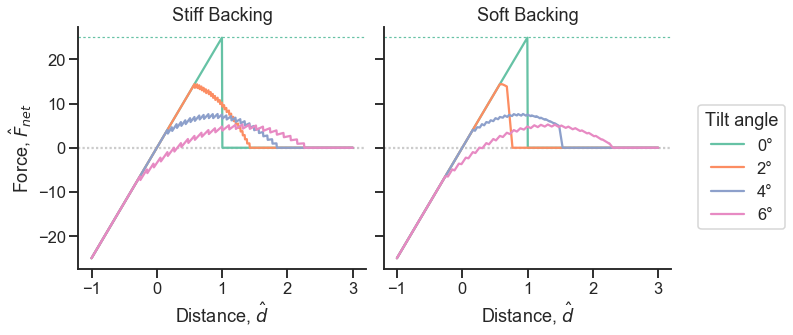

,Distance,Force,No. of hairs,Backing,Tilt angle,N_c,d_c
0,-1.000000,-25.000000,NaN,Soft,6°,0.566772,2.299626
1,-0.993322,-24.833055,NaN,Soft,6°,0.566772,2.299626
2,-0.986644,-24.666110,NaN,Soft,6°,0.566772,2.299626
3,-0.979967,-24.499165,NaN,Soft,6°,0.566772,2.299626
4,-0.973289,-24.332220,NaN,Soft,6°,0.566772,2.299626


In [34]:
#calculate from direct F-d equations
f_p = 1 #non-dimensional f_max/(k_h*w)
angle_list = [0,2,4,6] #degrees
k_ratio = 10 #k_b/k_h
N_t = 25 #total hairs in contact
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(-1,3, num)

df = pd.DataFrame()

for angle in angle_list:
    d_c = (((N_t-1)/2)+k_ratio)*np.sin(angle*np.pi/180) #critical distance
    F_stiff = np.zeros([num], dtype=float)
    F_soft = np.zeros([num], dtype=float)
    N_full = np.zeros([num], dtype=float)
    d_prev_stiff = -2
    d_prev_soft = -2    
    for n in N:
        d_max = f_p+(((N_t+1)/2)-n)*np.sin(angle*np.pi/180)
        dl = (f_p/((n-1)+k_ratio)) #upward shift in backing        
        for i, x in enumerate(d):
            if x<=d_max and x>=d_prev_stiff:
                N_full[i] = n
                F_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(angle*np.pi/180))
            if x<=d_max and x>=d_prev_soft:
                F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(angle*np.pi/180))
            if angle != 0:          
                if x > d_max and x < d_max + dl:
                    F_soft[i] = -1e10
                    #F_stiff[i] = -1e10                
                # condition for propagation
                if x > d_c:
                    F_soft[i] = 0
        d_prev_soft = d_max + dl
        d_prev_stiff = d_max
    df_stiff = pd.DataFrame({'Distance': d, 'Force': F_stiff,
                            'No. of hairs': N_full})
    df_stiff['Backing'] = 'Stiff'
    df_soft = pd.DataFrame({'Distance': d, 'Force': F_soft})
    df_soft['Backing'] = 'Soft'
    df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
    df_full = df_stiff.append(df_soft)
    df_full['Tilt angle'] = f'{angle}°'
    #critical N for propogation
    N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
    df_full['N_c'] =N_c
    df_full['d_c'] =d_c
    df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Force', 
                hue = 'Tilt angle', col = 'Backing',
                kind = 'line', palette = pal[:len(angle_list)])    
#max adhesion
g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
titles = ['Stiff Backing', 'Soft Backing']
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
df.query('`Backing`=="Soft" & `Tilt angle`=="6°"').head()

In [35]:
df.query('`Backing`=="Soft" & `Tilt angle`=="2°"').shape

(575, 7)

In [14]:
plot_name = 'Figure2-Detachment_mechanism'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

# Figure 3: Reversibility of hairy pad adhesion

In [7]:
f_max_list = [0.01, 0.1, 1] #non-dimensional f_max/(k_h*w)
# angle_list = np.linspace(0,10, 40) #degrees
angle = np.append(np.linspace(0.01,0.09, 9), np.logspace(-1,np.log10(89), 40))
k_ratio_list = [10] #k_b/k_h
N_t_list = [10, 100]
# N = np.linspace(2, N_max, N_max-1)
df = pd.DataFrame()
for N_t in N_t_list:
    for k_ratio in k_ratio_list:
        for f_max in f_max_list:
#             for angle in angle_list: 
#             F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
            angle_c = np.arcsin(f_max/(N_t-1+k_ratio))*180/np.pi
#                 if angle != 0:
            N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
            N_net_max = (f_max/np.sin(angle*np.pi/180)) + 0.5 #N at F_net maxima
#             if N_net_max <= N_max: #maxima should lie within N_max
            F_maxima = ((f_max/2)*((f_max/np.sin(angle*np.pi/180))+1)) + (np.sin(angle*np.pi/180)/8)
#             else:
            F_end = (N_t*f_max) - ((N_t*(N_t-1)/2)*np.sin(angle*np.pi/180))
            F_adh = [F_maxima[i] if N_net_max[i] <= N_t else F_end[i] for i in range(len(angle))]
#                     if angle >= angle_c:
#                         F_max_soft = F_max_stiff
#                     else:
#                         F_max_soft = (N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))
#                 N_zero_id = np.where(N<N_c)[0]
#                 F_net_soft = np.array([F_net_stiff[i] \
#                                        if i not in N_zero_id else 0 \
#                                        for i in range(len(F_net_stiff))])
#                 else:
#                     N_c = N_max
#                     F_max_stiff = N_max*f_max
#                     F_max_soft = N_max*f_max

            df_temp = pd.DataFrame({'angle': angle,
                                    'Force': F_adh,
                                    'N_c': N_c,
                                    'N_max': N_net_max})
            #include zero angle data
            df_temp = df_temp.append(pd.DataFrame({'angle': [0],
                                                   'Force': [N_t*f_max],
                                                   'N_c': [N_t],
                                                   'N_max': [N_t]}))
#                 df_temp['angle'] = angle
            df_temp['F_max/F'] = (N_t*f_max)/df_temp['Force']
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
#             df_temp['N_c'] = N_c
            df_temp['angle_c'] = angle_c
            df_temp['N_t'] = N_t
#             df_temp['Force'] = df_temp['Force']/N_max 

            df = df.append(df_temp).reset_index(drop = True)

# df = df[df['Backing'] == 'Stiff']
# group_cols = list(df.columns.drop('N').drop('Force'))
# df_max = df.groupby(group_cols).max().reset_index()

In [8]:
df[df['angle']==angle[34]] #beetle reversibility at 7.9deg, f_max=0.1, N_t = 10

,angle,Force,N_c,N_max,F_max/F,f_max,k_ratio,angle_c,N_t
34,7.773822,0.022278,-8.926070,0.573930,4.488831,0.01,10,0.030156,10
84,7.773822,0.103873,-8.260699,1.239301,9.627149,0.10,10,0.301558,10
134,7.773822,4.213413,-1.606990,7.893010,2.373373,1.00,10,3.016961,10
184,7.773822,0.022278,-8.926070,0.573930,44.888314,0.01,10,0.005256,100
234,7.773822,0.103873,-8.260699,1.239301,96.271489,0.10,10,0.052565,100
284,7.773822,4.213413,-1.606990,7.893010,23.733729,1.00,10,0.525657,100


C:\Users\adwait\Desktop\Python\Buggee\environment\lib\site-packages\mpl_toolkits\axes_grid1\inset_locator.py:507: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0,0,1,1) now.
  warnings.warn("Using the axes or figure transform requires a "


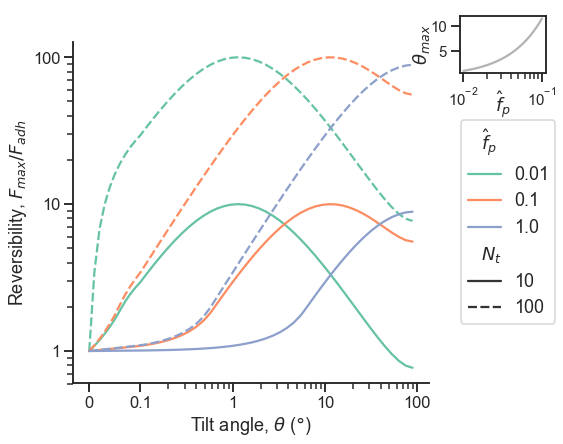

In [9]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette('Set2') #hue parameter
g = sns.relplot(data=df, x = 'angle', y = 'F_max/F', hue = 'f_max', style = 'N_t',
                kind = 'line', 
                palette = pal[:len(f_max_list)])
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_yscale('log')
        ax2.set_xscale('symlog', linthreshx = 0.1,
                      subsx = [2,3,4,5,6,7,8,9],
                      linscalex = 0.5)        
        formattery = matplotlib.ticker.ScalarFormatter()
        ax2.yaxis.set_major_formatter(formattery)
        formatterx = matplotlib.ticker.FixedFormatter(['0','0.1','1','10','100'])
        ax2.xaxis.set_major_formatter(formatterx)
        
latex_map = {'f_max': r'$\hat{f}_{p}$',
             'N_t': r'$N_t$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels(r'Tilt angle, $\theta$ ($\degree$)', r'Reversibility, $F_{max}/F_{adh}$')

g.fig.set_size_inches(8, 6)

leg = g._legend
leg.set_frame_on(True)
# g.tight_layout(w_pad=0)
# plt.show()
#calculate Fmin/Fmax
N_t = 1
f_p = np.logspace(-2,-1,40)
# f_p = np.linspace(0.01,0.5,40)
angle_min = np.array([np.arcsin(2*f)*180/np.pi if 2*f <=1 else 90 for f in f_p])
F_min = ((f_p/2)*((f_p/np.sin(angle_min*np.pi/180))+1)) + (np.sin(angle_min*np.pi/180)/8)
F_max = N_t*f_p
F_red = F_min/F_max

# plot inset
from mpl_toolkits.axes_grid1 import inset_locator
ins_ax = inset_locator.inset_axes(g.axes[0][0],width="15%", # width = 30% of parent_bbox
                               height=0.8, # height : 1 inch
                               loc='upper right',
                                 bbox_transform = g.fig.transFigure)

ins_ax.plot(f_p, angle_min, '-', color = pal[7])
ins_ax.set_xscale('symlog', linthreshx = 0.01, subsx = [2,3,4,5,6,7,8,9])
ins_ax.set_xlabel(r'$\hat{f}_p$', labelpad=-20)
ins_ax.set_ylabel(r'$\theta_{max}$', labelpad=-2)
# ax1.set_ylabel(r'$N_tF_{min}/F_{max}$', fontsize=15, color = pal[0], labelpad=-2)
# ax1.set_xticks([0.01, 0.1, 1], minor=True)
# formatter = matplotlib.ticker.FixedFormatter([0.01, 0.1, 1])
locator = matplotlib.ticker.LogLocator()
locator.set_params(numticks = 3, numdecs=3)
ins_ax.xaxis.set_major_locator(locator)
# formatter = matplotlib.ticker.ScalarFormatter()
# formatter = matplotlib.ticker.FixedFormatter(['0.01', '0.1', '1'])
# ins_ax.xaxis.set_major_formatter(formatter)
# ins_ax.set_yticks([0,25, 50, 75], minor=True)
ins_ax.tick_params(axis='both',labelsize=15)
# ax1.spines['left'].set_color(pal[0])
# ax1.tick_params(axis='y', color=pal[0], labelcolor=pal[0], labelsize=15)
# ax1.set_ylabel(r'$\theta_{min}$', fontsize=15, color = pal[1])
# ax2.spines['right'].set_color(pal[1])
# ax2.tick_params(axis='y', color=pal[1], labelcolor=pal[1], labelsize=15)
# ax1.tight_layout()
# plt.xscale('log')

# leg._loc = 4 #legend location

plt.show()

In [10]:
plot_name = 'Figure3-Reversibility'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

# Figure 4: Critical tilt angle

In [11]:
f_max_list = [0.01, 0.1, 1] #non-dimensional f_max/(k_h*w)
k_ratio_list = np.logspace(0,3, 100) #k_b/k_h
N_max_list = [10, 100]
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for N_max in N_max_list:
            #critical angle for propogation
            sin_c = f_max/(N_max-1+k_ratio)
            if sin_c <= 1 and sin_c >= -1:
                angle_c = np.arcsin(sin_c)*180/np.pi
            else:
                angle_c = 90
            df_temp = pd.DataFrame({'angle_c': [angle_c],
                                   'f_max': [f_max],
                                   'k_ratio': [k_ratio],
                                   'N': [N_max]})
            df = df.append(df_temp)

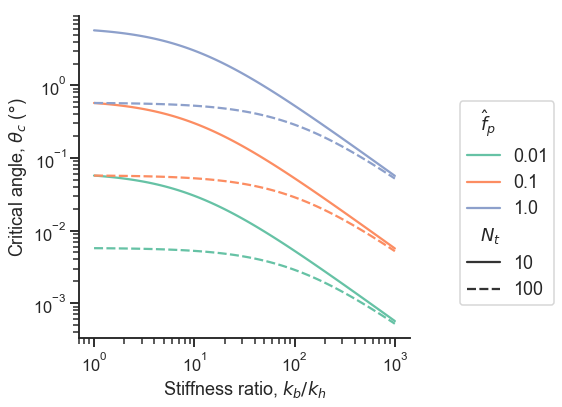

In [12]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette('Set2')[:len(f_max_list)] #hue parameter
g = sns.relplot(data = df, x = 'k_ratio', y = 'angle_c', hue = 'f_max',
                style = 'N', kind = 'line', marker = None, palette = pal)
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_xscale('log')
        ax2.set_yscale('log')
#         ax2.minorticks_off()

latex_map = {'f_max': r'$\hat{f}_{p}$',
            'N': r'$N_t$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels('Stiffness ratio, $k_b/k_h$', r'Critical angle, $\theta_c$ ($\degree$)')

leg = g._legend
leg.set_frame_on(True)

g.fig.set_size_inches(8, 6)
g.tight_layout(w_pad=0)
plt.show()

In [13]:
plot_name = 'Figure4-Critical_tilt_angle'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

In [7]:
print('theta_min for beetle', np.arcsin(2*0.1)*180/np.pi)
print('theta_lim for beetle', np.arctan(50*0.25/(9*10))*180/np.pi)

theta_min for beetle 11.536959032815489
theta_lim for beetle 7.907162702958458


# Moment

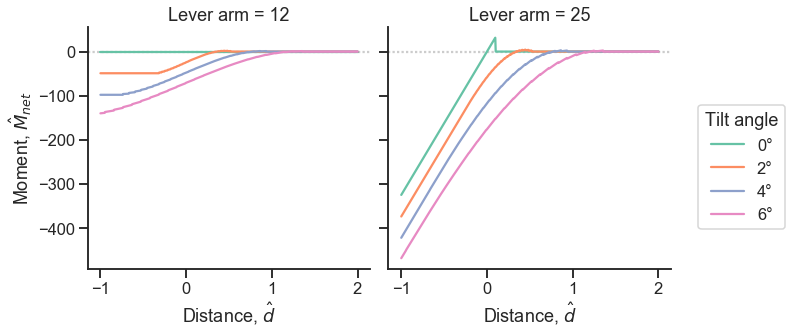

In [11]:
#calculate from direct F-d equations
f_p = 0.1 #non-dimensional f_max/(k_h*w)
angle_list = [0,2,4,6] #degrees
N_t = 25 #total hairs in contact
s_list = [12, 25] #hinge lever length
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(-1,2, num) #distance from midpoint of array

df = pd.DataFrame()

for s in s_list:
    for angle in angle_list:
    #     d_c = (((N_t-1)/2)+k_ratio)*np.sin(angle*np.pi/180) #critical distance
        M_stiff = np.zeros([num], dtype=float)
        ds = np.zeros([num], dtype=float) #distance at hinge
        #F_soft = np.zeros([num], dtype=float)
        d_prev_stiff = -2e10
#         d_prev_soft = -2    
        for n in N:
            d_max = f_p+((s-n+1)*np.sin(angle*np.pi/180))
    #         dl = (f_p/((n-1)+k_ratio)) #upward shift in backing        
            for i, x in enumerate(d):
                ds[i] = x + (s-((N_t-1)/2))*np.sin(angle*np.pi/180)
                if ds[i]<=d_max and ds[i]>=d_prev_stiff:
                    #M_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(angle*np.pi/180))
                    a = ((n-1)/2) - s
                    M_stiff[i] = -(n*np.cos(angle*np.pi/180))*((np.sin(angle*np.pi/180)*(a**2) +\
                                                               (ds[i]*a) + (((n+1)**2)/12)*np.sin(angle*np.pi/180)))
            d_prev_stiff = d_max
        df_stiff = pd.DataFrame({'Distance': d, 
                                 'Distance_s': ds,
                                 'Lever arm': s,
                                 'Moment': M_stiff})
        df_stiff['Backing'] = 'Stiff'
    #     df_soft = pd.DataFrame({'Distance': d, 'Force': F_soft})
    #     df_soft['Backing'] = 'Soft'
    #     df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
        df_full = df_stiff#.append(df_soft)
        df_full['Tilt angle'] = f'{angle}°'
        #critical N for propogation
    #     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
    #     df_full['N_c'] =N_c
    #     df_full['d_c'] =d_c
        df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Moment', hue = 'Tilt angle', col = 'Lever arm',
                kind = 'line', palette = pal[:len(angle_list)])    
#max adhesion
# g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Moment, $\hat{M}_{net}$')
# g.fig.set_size_inches(8, 6)

# for ax1 in g.axes:
#     for ax2 in ax1:
# #         ax2.set_xscale('log')
# #         ax2.set_yscale('symlog')
#         ax2.set_ylim([-5,7])
#replace titles
# titles = ['Stiff Backing', 'Soft Backing']
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.set_title(titles[i])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
# df.query('`Backing`=="Soft" & `Tilt angle`=="6°"').head()

In [63]:
df[df['Lever arm']==25]

,Distance,Distance_s,Lever arm,Moment,Backing,Tilt angle
0,-1.000000,-1.000000,25,-325.000000,Stiff,0°
1,-0.994992,-0.994992,25,-323.372287,Stiff,0°
2,-0.989983,-0.989983,25,-321.744574,Stiff,0°
3,-0.984975,-0.984975,25,-320.116861,Stiff,0°
4,-0.979967,-0.979967,25,-318.489149,Stiff,0°
...,...,...,...,...,...,...
595,1.979967,3.338837,25,0.000000,Stiff,6°
596,1.984975,3.343845,25,0.000000,Stiff,6°
597,1.989983,3.348853,25,0.000000,Stiff,6°
598,1.994992,3.353862,25,0.000000,Stiff,6°


# Detach by rotation

In [97]:
#calculate from direct F-d equations
f_p = 1 #non-dimensional f_max/(k_h*w)

N_t = 25 #total hairs in contact
s_list = [25,50] #hinge lever length
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 300 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
# d_init = -1 #inital distance from midpoint of array
d_init_list = [-1, -0.5, 0, 0.5]
angle_init = 0 #initial angle (degrees)
angle_list = np.linspace(angle_init, -6, num) #angles (degrees)

df = pd.DataFrame()

for s in s_list:
    for d_init in d_init_list:
        ds = d_init + (s-((N_t-1)/2))*np.sin(angle_init*np.pi/180) #distance at hinge (fixed)
        print(ds)
        M_stiff = np.zeros([num], dtype=float)
        F_stiff = np.zeros([num], dtype=float)
        d = np.zeros([num], dtype=float) #distance at center
        N_full = np.zeros([num], dtype=float) #n at each point
        for angle in angle_list:
        #     d_c = (((N_t-1)/2)+k_ratio)*np.sin(angle*np.pi/180) #critical distance


            #F_soft = np.zeros([num], dtype=float)
            angle_prev_Stiff = 2e10
    #         d_prev_soft = -2    
            for n in N:
                angle_min1 = (np.arcsin((ds-f_p)/(s-n+1)))*180/np.pi #detach from left (angle>0)
                angle_min2 = -(np.arcsin((f_p-ds)/(s)))*180/np.pi #detach from right (angle<0)
    #             d_max = f_p+((s-n+1)*np.sin(angle*np.pi/180))
        #         dl = (f_p/((n-1)+k_ratio)) #upward shift in backing        
                for i, angle in enumerate(angle_list):
                    d[i] = ds - (s-((N_t-1)/2))*np.sin(angle*np.pi/180)
                    angle_min = angle_min1 if angle > 0 else angle_min2
                    if angle>=angle_min and angle<=angle_prev_Stiff:
                        N_full[i] = n
                        #DEBUG: check Force/Moment equations for negative angles
                        F_stiff[i] = n*d[i]-(n*((N_t-n)/2)*np.sin(angle*np.pi/180))
                        #M_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(angle*np.pi/180))
                        a = ((n-1)/2) - s
                        M_stiff[i] = -(n*np.cos(angle*np.pi/180))*((np.sin(angle*np.pi/180)*(a**2) +\
                                                                   (ds*a) + (((n+1)**2)/12)*np.sin(angle*np.pi/180)))
                angle_prev_Stiff = angle_min
        df_stiff = pd.DataFrame({'Distance': d, 
                                 'Tilt angle': -angle_list,
                                 'Hinge position': s,
                                 'No. of hairs': N_full,
                                 'Moment': M_stiff,
                                'Force': F_stiff})
        df_stiff['Backing'] = 'Stiff'
        df_stiff['Distance init'] = d_init
        df_stiff['Hinge height'] = ds
        
    #     df_soft = pd.DataFrame({'Distance': d, 'Force': F_soft})
    #     df_soft['Backing'] = 'Soft'
    #     df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
        df_full = df_stiff#.append(df_soft)
#         df_full['Tilt angle'] = f'{angle}°'
        #critical N for propogation
    #     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
    #     df_full['N_c'] =N_c
    #     df_full['d_c'] =d_c
        df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')
d_init_list.reverse()
pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Tilt angle', y = 'Force', 
                hue = 'Hinge height', col = 'Hinge position',
                kind = 'line', palette = pal[:len(d_init_list)],
               hue_order=d_init_list)    
#max adhesion
# g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels(r'Angle, $\theta$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

# for ax1 in g.axes:
#     for ax2 in ax1:
# #         ax2.set_xscale('log')
# #         ax2.set_yscale('symlog')
#         ax2.set_ylim([-5,10])
#replace titles
# titles = ['Stiff Backing', 'Soft Backing']
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.set_title(titles[i])

# leg = g._legend
# leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
# df.query('`Backing`=="Soft" & `Tilt angle`=="6°"').head()

-1.0


__main__:32: RuntimeWarning: invalid value encountered in arcsin


-0.5
0.0
0.5
-1.0


KeyboardInterrupt: 

In [92]:
plot_name = 'test'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

# Case 2: Free hinge pulled vertically up

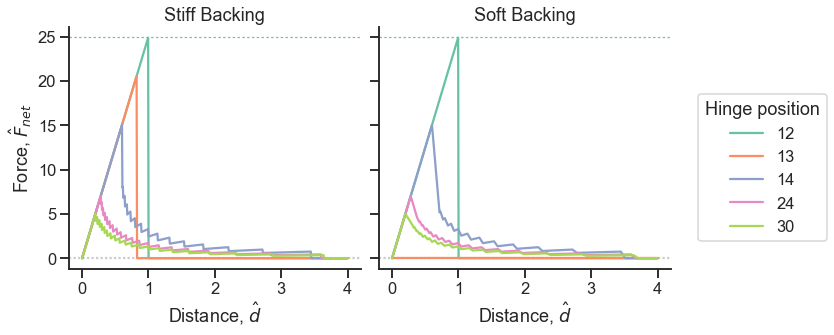

In [107]:
#calculate from direct F-d equations
f_p = 1 #non-dimensional f_max/(k_h*w)
k_ratio = 10 #k_b/k_h
N_t = 25 #total hairs in contact
s_list = [12, 13, 14, 24, 30] #hinge position from array tip
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(0,4, num) #BUG: doesn't work for negative values

df = pd.DataFrame()
#BUG: check angle sign! code fails for neative angles
for s in s_list:
    F_stiff = np.zeros([num], dtype=float)
    F_soft = np.zeros([num], dtype=float)
    N_full = np.zeros([num], dtype=float)
    angle = np.zeros([num], dtype=float)
    ds = np.zeros([num], dtype=float)
    d_prev_stiff = -1e10
    d_prev_soft = -1e10    
    prop = False
    for n in N:        
        dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
        a = s - ((n-1)/2)
        for i, x in enumerate(d):            
            tilt_angle = np.arcsin(a*x/((a*(N_t-n)/2)+(((n+1)**2)/12)))*180/np.pi
            ds[i] = x + (s-((N_t-1)/2))*np.sin(tilt_angle*np.pi/180) #CHECK THIS! doesn't work after hair detachment
            d_max = f_p+(((N_t+1)/2)-n)*np.sin(tilt_angle*np.pi/180)
            d_c = (((N_t-1)/2)+k_ratio)*np.sin(tilt_angle*np.pi/180) #critical distance
#             print(n, x, tilt_angle, d_max)
            if x<=d_max and x>d_prev_stiff:
#                 print('in')
                
                angle[i] = tilt_angle
                N_full[i] = n
                F_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(angle[i]*np.pi/180))                
#                 M_stiff[i] = -(n*np.cos(angle*np.pi/180))*((np.sin(angle*np.pi/180)*(a**2) -\
#                                                            (ds*a) + (((n+1)**2)/12)*np.sin(angle*np.pi/180)))

            #BUG: Check soft backing case properly ast s = 13 or 11
            if x<=d_max and x>=d_prev_soft:
                
                F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
#                 print('soft',n,x,tilt_angle, d_c, F_soft[i])
            if tilt_angle != 0.0:          
#                 if x > d_max and x < d_max + dl:                    
#                     F_soft[i] = 10#-1e10
#                     print('bad',n,x,tilt_angle, d_c, F_soft[i])
                    #F_stiff[i] = -1e10                
                # condition for propagation
                if x > d_c and n != N_t:
#                     print(n,x,tilt_angle, d_c)
#                     break
                    F_soft[i] = 0
                    prop = True
            if x > d_max:
                if tilt_angle != 0.0:
                    if prop == True:
                         F_soft[i:] = 0
                    else:
                        F_soft[i:] = -1e10
                d_prev_soft = d[i-1] + dl
                d_prev_stiff = d[i-1]
                break
#         print(d_max)
        if tilt_angle == 0.0 or prop == True:
            break
    df_stiff = pd.DataFrame({'Distance': d, 
                             'Hinge distance': ds, 
                             'Force': F_stiff,
                            'No. of hairs': N_full,
                            'Tilt angle': angle})
    df_stiff['Backing'] = 'Stiff'
    df_soft = pd.DataFrame({'Distance': d, 
                            'Hinge distance': ds,
                            'Force': F_soft,
                           'No. of hairs': N_full,
                            'Tilt angle': angle})
    df_soft['Backing'] = 'Soft'
    df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
    df_full = df_stiff.append(df_soft)
    df_full['Hinge position'] = s
    #critical N for propogation
#     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
#     df_full['N_c'] =N_c
#     df_full['d_c'] =d_c
    df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Force', 
                hue = 'Hinge position', col = 'Backing',
                kind = 'line', palette = pal[:len(s_list)])    
#max adhesion
g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
titles = ['Stiff Backing', 'Soft Backing']
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
#df.query('`Backing`=="Soft" & `Hinge position`==18 & `Distance`>0.5')

# Case 2: Free hinge, vertical detachment

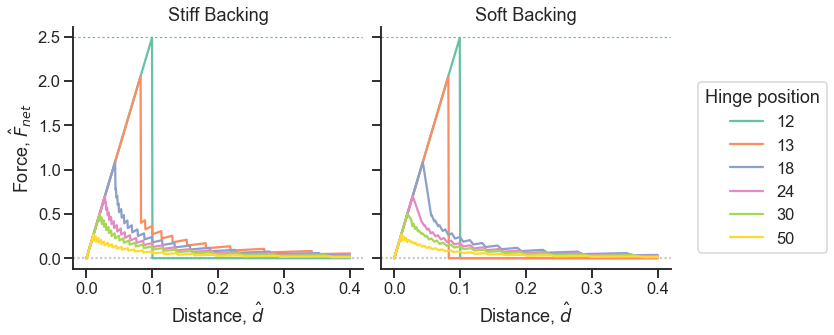

In [32]:
#calculate from direct F-d equations
f_p = 0.1 #non-dimensional f_max/(k_h*w)
k_ratio = 10 #k_b/k_h
N_t = 25 #total hairs in contact
s_list = [12,13,18,24,30,50] #hinge position from array tip
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(0,0.4, num) #BUG: doesn't work for negative values
# d = np.linspace(0,-1, num) #negative d

df = pd.DataFrame()
#BUG: check angle sign! code fails for neative angles
for s in s_list:
    F_stiff = np.zeros([num], dtype=float)
    F_soft = np.zeros([num], dtype=float)
    N_full = np.zeros([num], dtype=float)
    angle = np.zeros([num], dtype=float)
    ds = np.zeros([num], dtype=float)
#     d_prev_stiff = -1e10
#     d_prev_soft = -1e10    
    d_shift = -1e10 #shifted distance after a detachment due to backing deformation
    prop = False
    n = N_t
#     for n in N:        
#     dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
#     a = s - ((n-1)/2)
#     for i, x in enumerate(d): 
    i = 0
    while i<num:
        x = d[i]        
        a = s - ((n-1)/2)
        theta = np.arcsin(a*x/((a*(N_t-n)/2)+(((n+1)**2)/12)))*180/np.pi
        tilt_angle = theta
        ds[i] = x + (s-((N_t-1)/2))*np.sin(tilt_angle*np.pi/180) #CHECK THIS! doesn't work after hair detachment
        d_max = f_p+(((N_t+1)/2)-n)*np.sin(tilt_angle*np.pi/180)
        
        dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
        d_c = (((N_t-1)/2)+k_ratio)*np.sin(theta*np.pi/180) #critical distance
#             print(n, x, tilt_angle, d_max)
        if x<=d_max:# and x>d_prev_stiff:
#                 print('in')

            angle[i] = theta
            N_full[i] = n
            F_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))             
#                 M_stiff[i] = -(n*np.cos(angle*np.pi/180))*((np.sin(angle*np.pi/180)*(a**2) -\
#                                                            (ds*a) + (((n+1)**2)/12)*np.sin(angle*np.pi/180)))
            if x < d_shift and prop == False:
                F_soft[i] = -1e10
            elif prop == True:
                F_soft[i] = 0
            elif x <= d_c or n == N_t or tilt_angle == 0.0:
                F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
            i += 1
        else:
            n -= 1
            if x <= d_c and prop == False:
                F_soft[i] = -1e10
                d_shift = d_max + dl
#                 prop = False
            else:
                d_shift = -1e10
                prop = True
            if tilt_angle == 0.0 or n == 0:
                ds[i+1:] = d[i+1:]
                break
        
        #BUG: Check soft backing case properly ast s = 13 or 11
#         if x<=d_max and x>=d_prev_soft:

#             F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
# #                 print('soft',n,x,tilt_angle, d_c, F_soft[i])
#         if tilt_angle != 0.0:          
# #                 if x > d_max and x < d_max + dl:                    
# #                     F_soft[i] = 10#-1e10
# #                     print('bad',n,x,tilt_angle, d_c, F_soft[i])
#                 #F_stiff[i] = -1e10                
#             # condition for propagation
#             if x > d_c and n != N_t:
# #                     print(n,x,tilt_angle, d_c)
# #                     break
#                 F_soft[i] = 0
#                 prop = True
#         if x > d_max:
#             if tilt_angle != 0.0:
#                 if prop == True:
#                      F_soft[i:] = 0
#                 else:
#                     F_soft[i:] = -1e10
#             d_prev_soft = d[i-1] + dl
#             d_prev_stiff = d[i-1]
#             break
# #         print(d_max)
#     if tilt_angle == 0.0 or prop == True:
#         break
    df_stiff = pd.DataFrame({'Distance': d, 
                             'Hinge distance': ds, 
                             'Force': F_stiff,
                            'No. of hairs': N_full,
                            'Tilt angle': angle})
    df_stiff['Backing'] = 'Stiff'
    df_soft = pd.DataFrame({'Distance': d, 
                            'Hinge distance': ds,
                            'Force': F_soft,
                           'No. of hairs': N_full,
                            'Tilt angle': angle})
    df_soft['Backing'] = 'Soft'
    df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
    df_full = df_stiff.append(df_soft)
    df_full['Hinge position'] = s
    #critical N for propogation
#     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
#     df_full['N_c'] =N_c
#     df_full['d_c'] =d_c
    df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Force', 
                hue = 'Hinge position', col = 'Backing',
                kind = 'line', palette = pal[:len(s_list)])    
#max adhesion
g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
titles = ['Stiff Backing', 'Soft Backing']
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
#df.query('`Backing`=="Soft" & `Hinge position`==18 & `Distance`>0.5')

# Case 1: Fixed hinge/tilt, vertical detachment

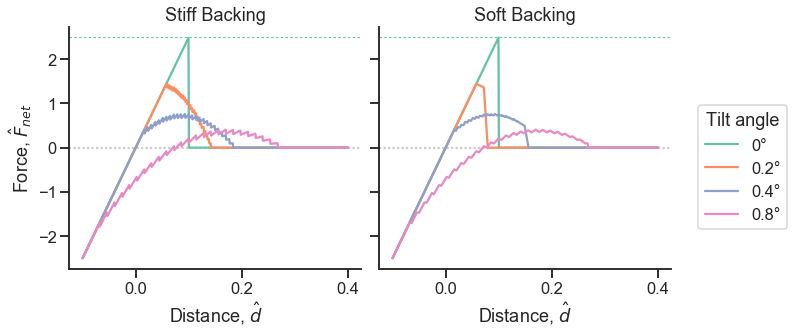

In [40]:
#calculate from direct F-d equations
f_p = 0.1 #non-dimensional f_max/(k_h*w)
angle_list = [0,0.2,0.4,0.8] #degrees
k_ratio = 10 #k_b/k_h
N_t = 25 #total hairs in contact
s = 12 #hinge position from array tip
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(-0.1,0.4, num) #BUG: doesn't work for negative values

df = pd.DataFrame()
#BUG: check angle sign! code fails for neative angles
for tilt_angle in angle_list:
    F_stiff = np.zeros([num], dtype=float)
    F_soft = np.zeros([num], dtype=float)
    N_full = np.zeros([num], dtype=float)
#     angle = np.zeros([num], dtype=float)
    ds = np.zeros([num], dtype=float)
#     d_prev_stiff = -1e10
#     d_prev_soft = -1e10    
    d_shift = -1e10 #shifted distance after a detachment due to backing deformation
    prop = False
    n = N_t
#     for n in N:        
#     dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
#     a = s - ((n-1)/2)
#     for i, x in enumerate(d): 
    i = 0
    while i<num:
        x = d[i]        
        a = s - ((n-1)/2)
#         tilt_angle = np.arcsin(a*x/((a*(N_t-n)/2)+(((n+1)**2)/12)))*180/np.pi
        ds[i] = x + (s-((N_t-1)/2))*np.sin(tilt_angle*np.pi/180) #CHECK THIS! doesn't work after hair detachment
        d_max = f_p+(((N_t+1)/2)-n)*np.sin(tilt_angle*np.pi/180)
        
        dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
        d_c = (((N_t-1)/2)+k_ratio)*np.sin(tilt_angle*np.pi/180) #critical distance
#             print(n, x, tilt_angle, d_max)
        if x<=d_max:# and x>d_prev_stiff:
#                 print('in')

#             angle[i] = tilt_angle
            N_full[i] = n
            F_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))             
#                 M_stiff[i] = -(n*np.cos(angle*np.pi/180))*((np.sin(angle*np.pi/180)*(a**2) -\
#                                                            (ds*a) + (((n+1)**2)/12)*np.sin(angle*np.pi/180)))
            if x < d_shift and prop == False:
                F_soft[i] = -1e10
            elif prop == True:
                F_soft[i] = 0
            elif x <= d_c or n == N_t or tilt_angle == 0.0:
                F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
            i += 1
        else:
            n -= 1
            if x <= d_c and prop == False:
                F_soft[i] = -1e10
                d_shift = d_max + dl
#                 prop = False
            else:
                d_shift = -1e10
                prop = True
            if tilt_angle == 0.0 or n == 0:
                ds[i+1:] = d[i+1:]
                break
        
        #BUG: Check soft backing case properly ast s = 13 or 11
#         if x<=d_max and x>=d_prev_soft:

#             F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
# #                 print('soft',n,x,tilt_angle, d_c, F_soft[i])
#         if tilt_angle != 0.0:          
# #                 if x > d_max and x < d_max + dl:                    
# #                     F_soft[i] = 10#-1e10
# #                     print('bad',n,x,tilt_angle, d_c, F_soft[i])
#                 #F_stiff[i] = -1e10                
#             # condition for propagation
#             if x > d_c and n != N_t:
# #                     print(n,x,tilt_angle, d_c)
# #                     break
#                 F_soft[i] = 0
#                 prop = True
#         if x > d_max:
#             if tilt_angle != 0.0:
#                 if prop == True:
#                      F_soft[i:] = 0
#                 else:
#                     F_soft[i:] = -1e10
#             d_prev_soft = d[i-1] + dl
#             d_prev_stiff = d[i-1]
#             break
# #         print(d_max)
#     if tilt_angle == 0.0 or prop == True:
#         break
    df_stiff = pd.DataFrame({'Distance': d, 
                             'Hinge distance': ds, 
                             'Force': F_stiff,
                            'No. of hairs': N_full})
    df_stiff['Backing'] = 'Stiff'
    df_soft = pd.DataFrame({'Distance': d, 
                            'Hinge distance': ds,
                            'Force': F_soft,
                           'No. of hairs': N_full})
    df_soft['Backing'] = 'Soft'
    df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
    df_full = df_stiff.append(df_soft)
    df_full['Hinge position'] = s
    df_full['Tilt angle'] = f'{tilt_angle}°'
    #critical N for propogation
#     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
#     df_full['N_c'] =N_c
#     df_full['d_c'] =d_c
    df = df.append(df_full)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Force', 
                hue = 'Tilt angle', col = 'Backing',
                kind = 'line', palette = pal[:len(angle_list)])    
#max adhesion
g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
titles = ['Stiff Backing', 'Soft Backing']
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
#df.query('`Backing`=="Soft" & `Hinge position`==18 & `Distance`>0.5')

# Case 3: Detachment by rotation

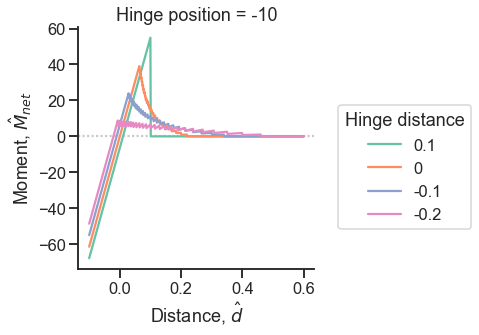

In [49]:
#calculate from direct F-d equations
f_p = 0.1 #non-dimensional f_max/(k_h*w)
k_ratio = 10 #k_b/k_h
N_t = 25 #total hairs in contact
s_list = [-10] #hinge position from array tip
ds_list = [0.1,0,-0.1, -0.2] # hinge distance
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
num = 600 #number of points in curve
N = np.linspace(N_t, 0, N_t+1)
d = np.linspace(-0.1,0.6, num) #BUG: doesn't work for negative values
# d = np.linspace(0,-1, num) #negative d

df = pd.DataFrame()
for ds in ds_list:
    #BUG: check angle sign! code fails for neative angles
    for s in s_list:
        F_stiff = np.zeros([num], dtype=float)
        M_stiff = np.zeros([num], dtype=float)
        N_full = np.zeros([num], dtype=float)
        angle = np.zeros([num], dtype=float)
#         ds = np.zeros([num], dtype=float)
    #     d_prev_stiff = -1e10
    #     d_prev_soft = -1e10    
#         d_shift = -1e10 #shifted distance after a detachment due to backing deformation
#         prop = False
        n = N_t
    #     for n in N:        
    #     dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
    #     a = s - ((n-1)/2)
    #     for i, x in enumerate(d): 
        i = 0
        while i<num:
            x = d[i]        
            a = s - ((n-1)/2)
            theta = np.arcsin((ds-x)/(s-((N_t-1)/2)))*180/np.pi
            tilt_angle = theta
    #         ds[i] = x + (s-((N_t-1)/2))*np.sin(tilt_angle*np.pi/180) #CHECK THIS! doesn't work after hair detachment
            d_max = f_p+(((N_t+1)/2)-n)*np.sin(tilt_angle*np.pi/180)

            dl = (f_p/((n-1)+k_ratio)) #upward shift in backing
            d_c = (((N_t-1)/2)+k_ratio)*np.sin(theta*np.pi/180) #critical distance
    #             print(n, x, tilt_angle, d_max)
            if x<=d_max:# and x>d_prev_stiff:
    #                 print('in')

                angle[i] = theta
                N_full[i] = n
                F_stiff[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))             
                M_stiff[i] = (n*np.cos(tilt_angle*np.pi/180))*((np.sin(tilt_angle*np.pi/180)*(a**2) -\
                                                           (ds*a) + (((n+1)**2)/12)*np.sin(tilt_angle*np.pi/180)))
#                 if x < d_shift and prop == False:
#                     F_soft[i] = -1e10
#                 elif prop == True:
#                     F_soft[i] = 0
#                 elif x <= d_c or n == N_t or tilt_angle == 0.0:
#                     F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
                i += 1
            else:
                n -= 1
#                 if x <= d_c and prop == False:
#                     F_soft[i] = -1e10
#                     d_shift = d_max + dl
#     #                 prop = False
#                 else:
#                     d_shift = -1e10
#                     prop = True
                if tilt_angle == 0.0 or n == 0:
#                     ds[i+1:] = d[i+1:]
                    break
        
        #BUG: Check soft backing case properly ast s = 13 or 11
#         if x<=d_max and x>=d_prev_soft:

#             F_soft[i] = n*x-(n*((N_t-n)/2)*np.sin(tilt_angle*np.pi/180))
# #                 print('soft',n,x,tilt_angle, d_c, F_soft[i])
#         if tilt_angle != 0.0:          
# #                 if x > d_max and x < d_max + dl:                    
# #                     F_soft[i] = 10#-1e10
# #                     print('bad',n,x,tilt_angle, d_c, F_soft[i])
#                 #F_stiff[i] = -1e10                
#             # condition for propagation
#             if x > d_c and n != N_t:
# #                     print(n,x,tilt_angle, d_c)
# #                     break
#                 F_soft[i] = 0
#                 prop = True
#         if x > d_max:
#             if tilt_angle != 0.0:
#                 if prop == True:
#                      F_soft[i:] = 0
#                 else:
#                     F_soft[i:] = -1e10
#             d_prev_soft = d[i-1] + dl
#             d_prev_stiff = d[i-1]
#             break
# #         print(d_max)
#     if tilt_angle == 0.0 or prop == True:
#         break
        df_stiff = pd.DataFrame({'Distance': d,
                                 'Force': F_stiff,
                                 'Moment': M_stiff,
                                'No. of hairs': N_full,
                                'Tilt angle': angle})
        df_stiff['Backing'] = 'Stiff'
#         df_soft = pd.DataFrame({'Distance': d, 
#                                 'Hinge distance': ds,
#                                 'Force': F_soft,
#                                'No. of hairs': N_full,
#                                 'Tilt angle': angle})
#         df_soft['Backing'] = 'Soft'
#         df_soft = df_soft[df_soft['Force'] != -1e10].reset_index(drop=True)
#         df_full = df_stiff.append(df_soft)
        df_stiff['Hinge position'] = s
        df_stiff['Hinge distance'] = ds
        #critical N for propogation
    #     N_c = (f_p/np.sin(angle*np.pi/180)) - k_ratio + 1 if angle != 0 else N_t
    #     df_full['N_c'] =N_c
    #     df_full['d_c'] =d_c
        df = df.append(df_stiff)

sns.set_context("talk")
sns.set_style("ticks")
#sns.set_palette('Set2')

pal = sns.color_palette('Set2')
g = sns.relplot(data=df, x = 'Distance', y = 'Moment', 
                hue = 'Hinge distance', col = 'Hinge position',
                col_order = s_list, hue_order=ds_list,
                kind = 'line', palette = pal[:len(ds_list)])    
#max adhesion
# g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Moment, $\hat{M}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
# titles = ['Stiff Backing', 'Soft Backing']
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()
#print for angle 6 deg
#df.query('`Backing`=="Soft" & `Hinge position`==18 & `Distance`>0.5')

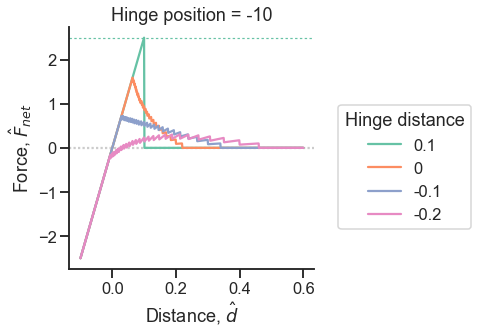

In [50]:
g = sns.relplot(data=df, x = 'Distance', y = 'Force', 
                hue = 'Hinge distance', col = 'Hinge position',
                col_order = s_list, hue_order=ds_list,
                kind = 'line', palette = pal[:len(ds_list)])    
#max adhesion
g.map(plt.axhline, y=N_t*f_p, color=pal[0], dashes=(2, 2), zorder=0, linewidth = 1.2)
#zero line
g.map(plt.axhline, y=0, color='0.8', dashes=(1, 1), zorder=0)
        
g.set_axis_labels('Distance, $\hat{d}$', r'Force, $\hat{F}_{net}$')
# g.fig.set_size_inches(8, 6)

#replace titles
# titles = ['Stiff Backing', 'Soft Backing']
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.set_title(titles[i])
#     ax.set_ylim([-10,10])

leg = g._legend
leg.set_frame_on(True)

g.tight_layout(w_pad=0)
plt.show()